In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline


Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the data file. And here is the codebook, with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

1) Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

2) Did people become happier from 2012 to 2014? Compute results for each country in the sample.

3) Who reported watching more TV in 2012, men or women?

4) Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

5) Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

6) Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?


In [2]:
ees = pd.read_csv('ESSdata_Thinkful.csv')
ees.shape

(8594, 13)

In [3]:
ees.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [4]:
ees = ees.dropna()
ees.shape

(8147, 13)

In [5]:
ees['cntry'].value_counts()

ES    2292
SE    1726
CH    1475
NO    1420
CZ    1207
DE      27
Name: cntry, dtype: int64

# Question 1: Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

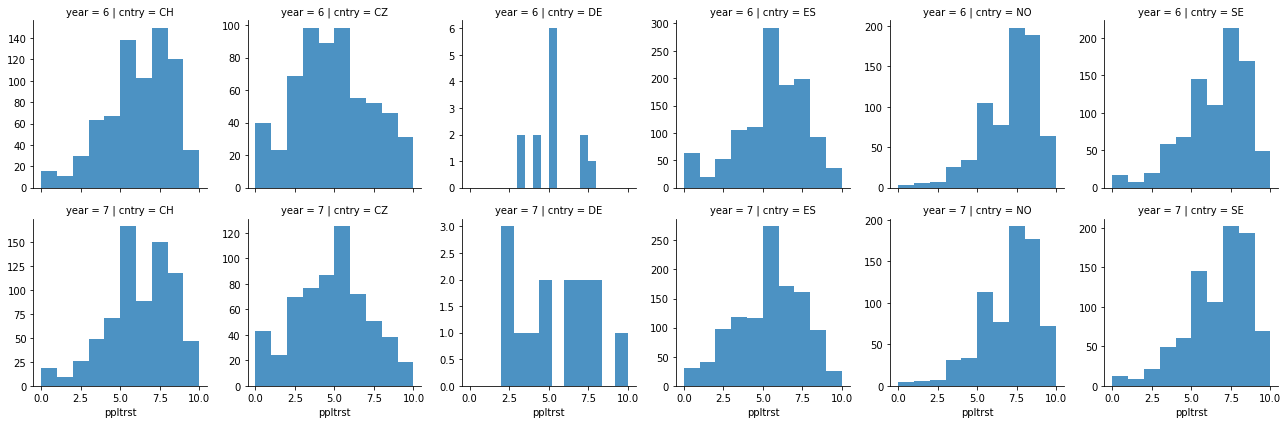

In [6]:
g = sns.FacetGrid(ees, row='year', col='cntry', dropna=True, sharey=False)
g = g.map(plt.hist, 'ppltrst', alpha=0.8)

In [18]:
from scipy import stats
from scipy.stats import kruskal, wilcoxon, mannwhitneyu


In [20]:
countrys = list(ees.cntry.unique())

for country in countrys:
    ees_score = ees[ees.cntry==country]
    print(country, mannwhitneyu(ees_score[ees_score.year==6].ppltrst, y=ees_score[ees_score.year == 7].ppltrst))
    


CH MannwhitneyuResult(statistic=265131.5, pvalue=0.19495027197081582)
CZ MannwhitneyuResult(statistic=176796.0, pvalue=0.18724347670459124)
DE MannwhitneyuResult(statistic=73.5, pvalue=0.19313536018324134)
ES MannwhitneyuResult(statistic=629830.0, pvalue=0.04263522765394516)
NO MannwhitneyuResult(statistic=220453.5, pvalue=1.2346345897635287e-05)
SE MannwhitneyuResult(statistic=369192.0, pvalue=0.37586498218551584)


# Question 2: Did people become happier from 2012 to 2014? Compute results for each country in the sample.

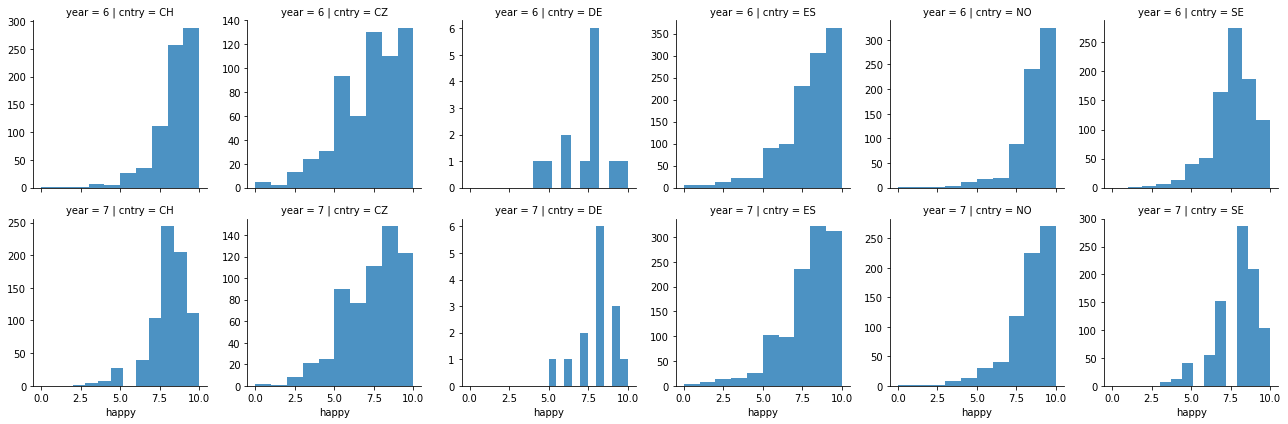

In [36]:
g = sns.FacetGrid(ees, row='year', col='cntry', dropna=True, sharey=False)
g = g.map(plt.hist, 'happy', alpha=0.8)

In [22]:
for country in countrys:
    ees_score = ees[ees.cntry==country]
    print(country, mannwhitneyu(ees_score[ees_score.year==6].happy, y=ees_score[ees_score.year == 7].happy))

CH MannwhitneyuResult(statistic=265131.5, pvalue=0.19495027197081582)
CZ MannwhitneyuResult(statistic=176796.0, pvalue=0.18724347670459124)
DE MannwhitneyuResult(statistic=73.5, pvalue=0.19313536018324134)
ES MannwhitneyuResult(statistic=629830.0, pvalue=0.04263522765394516)
NO MannwhitneyuResult(statistic=220453.5, pvalue=1.2346345897635287e-05)
SE MannwhitneyuResult(statistic=369192.0, pvalue=0.37586498218551584)


# Question 3: Who reported watching more TV in 2012, men or women?

In [25]:
ees_2012 = ees[ees.year==6]
ees_2012.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


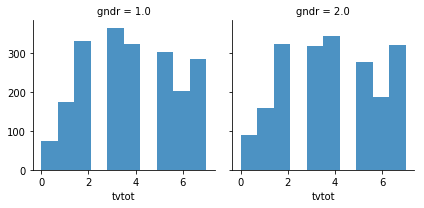

In [26]:
g = sns.FacetGrid(ees_2012, col='gndr', dropna=True, sharey=True)
g = g.map(plt.hist, 'tvtot', alpha=0.8)

In [72]:
x = ees_2012[ees_2012.gndr==1].tvtot
y = ees_2012[ees_2012.gndr==2].tvtot

genders = list(ees_2012.gndr.unique())

for gender in genders:
    ees_score = ees_2012[ees_2012.gndr==gender]
    print(genders, mannwhitneyu(x,y))

[2.0, 1.0] MannwhitneyuResult(statistic=2042391.5, pvalue=0.2165401933322842)
[2.0, 1.0] MannwhitneyuResult(statistic=2042391.5, pvalue=0.2165401933322842)


In [77]:
len(x)
len(y)

2018

In [79]:
wilcoxon(x[:2018],y)                                 

WilcoxonResult(statistic=713031.0, pvalue=0.5367584843203085)

# Question 4: Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

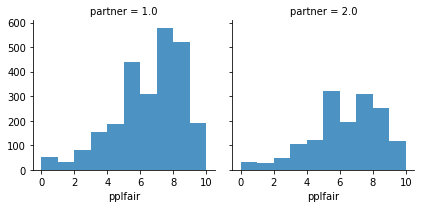

In [42]:
g = sns.FacetGrid(ees_2012, col='partner', dropna=True, sharey=True)
g = g.map(plt.hist, 'pplfair', alpha=0.8)

In [80]:
ees_2012['partner'].value_counts()

1.0    2542
2.0    1529
Name: partner, dtype: int64

In [81]:
x = ees_2012[ees_2012.partner==1].pplfair
y = ees_2012[ees_2012.partner==2].pplfair


In [82]:
wilcoxon(x[:1529],y)    

WilcoxonResult(statistic=380489.5, pvalue=0.002604289554451065)

# Question 5: Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [86]:
ees_2014 = ees[ees.year==7]
ees_2014.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
773,CH,5.0,7,2.0,8.0,9.0,7.0,9.0,6.0,4.0,1.0,69.0,1.0
774,CH,25.0,7,4.0,4.0,2.0,5.0,6.0,5.0,3.0,1.0,30.0,1.0
775,CH,26.0,7,3.0,8.0,8.0,6.0,8.0,7.0,5.0,2.0,49.0,2.0
776,CH,28.0,7,2.0,7.0,7.0,5.0,9.0,6.0,2.0,1.0,51.0,1.0
777,CH,29.0,7,2.0,4.0,7.0,0.0,8.0,6.0,2.0,2.0,32.0,2.0


In [87]:
ees['cntry'].value_counts()

ES    2292
SE    1726
CH    1475
NO    1420
CZ    1207
DE      27
Name: cntry, dtype: int64

In [88]:
countries = ['ES', 'SE', 'CH', 'NO']

In [89]:
ees_2014_4C = ees_2014[(ees_2014.cntry.isin(countries))]
ees_2014_4C.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
773,CH,5.0,7,2.0,8.0,9.0,7.0,9.0,6.0,4.0,1.0,69.0,1.0
774,CH,25.0,7,4.0,4.0,2.0,5.0,6.0,5.0,3.0,1.0,30.0,1.0
775,CH,26.0,7,3.0,8.0,8.0,6.0,8.0,7.0,5.0,2.0,49.0,2.0
776,CH,28.0,7,2.0,7.0,7.0,5.0,9.0,6.0,2.0,1.0,51.0,1.0
777,CH,29.0,7,2.0,4.0,7.0,0.0,8.0,6.0,2.0,2.0,32.0,2.0


In [90]:
ees_2014_4C.cntry.value_counts()

ES    1134
SE     867
CH     743
NO     712
Name: cntry, dtype: int64

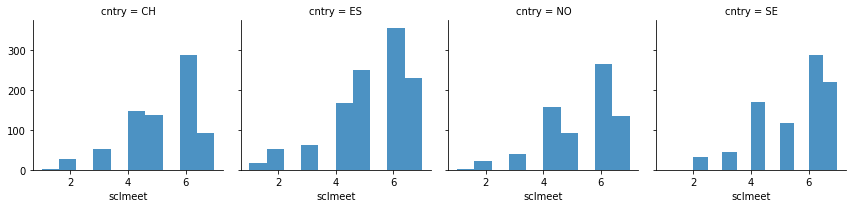

In [91]:
g = sns.FacetGrid(ees_2014_4C, col='cntry', dropna=True, sharey=True)
g = g.map(plt.hist, 'sclmeet', alpha=0.8)

In [92]:
kruskal(ees_2014_4C[ees_2014_4C.cntry=='CH'].sclmeet, ees_2014_4C [ees_2014_4C.cntry=='ES'].sclmeet, 
        ees_2014_4C [ees_2014_4C.cntry=='NO'].sclmeet, ees_2014_4C[ees_2014_4C.cntry=='SE'].sclmeet)

KruskalResult(statistic=20.151011215792035, pvalue=0.00015793910718244478)

# Question 6: Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out

In [55]:
ees_2014_4C.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
773,CH,5.0,7,2.0,8.0,9.0,7.0,9.0,6.0,4.0,1.0,69.0,1.0
774,CH,25.0,7,4.0,4.0,2.0,5.0,6.0,5.0,3.0,1.0,30.0,1.0
775,CH,26.0,7,3.0,8.0,8.0,6.0,8.0,7.0,5.0,2.0,49.0,2.0
776,CH,28.0,7,2.0,7.0,7.0,5.0,9.0,6.0,2.0,1.0,51.0,1.0
777,CH,29.0,7,2.0,4.0,7.0,0.0,8.0,6.0,2.0,2.0,32.0,2.0


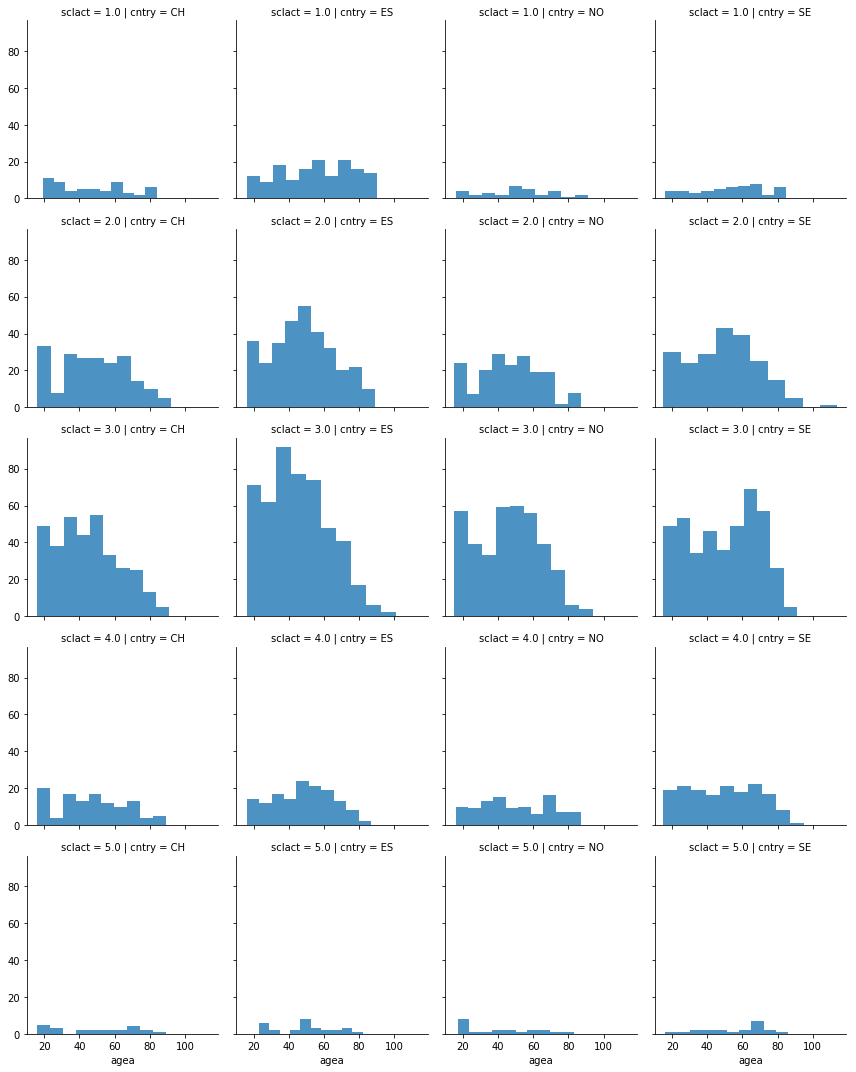

In [60]:
g = sns.FacetGrid(ees_2014_4C, row = 'sclact', col='cntry', dropna=True, sharey=True)
g = g.map(plt.hist, 'agea', alpha=0.8)

In [95]:
kruskal(ees_2014_4C[ees_2014_4C.cntry=='ES'].sclact, ees_2014_4C[ees_2014_4C.cntry == 'CH'].sclact,
             ees_2014_4C[ees_2014_4C.cntry == 'NO'].sclact, ees_2014_4C[ees_2014_4C.cntry == 'SE'].sclact)

KruskalResult(statistic=45.06202360796973, pvalue=8.976084640583497e-10)